In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 3.5)

In [2]:
def loop_coefficients(BLT):
    Delta = np.cbrt(36 * BLT**2 + np.sqrt(3) * np.sqrt(432 * BLT**4 + 848 * BLT**3 + 624 * BLT**2+ 204 * BLT + 25) +
                    36 * BLT + 9)
    z = ((12 * BLT + 6) / (3 * np.cbrt(6) * (2 * BLT + 1) * Delta) +
        (np.cbrt(2) * Delta) / (np.cbrt(9) * (2 * BLT + 1)) - 1)
    K1 = 1 - z**2
    K2 = (1 - z)**2
    return K1, K2

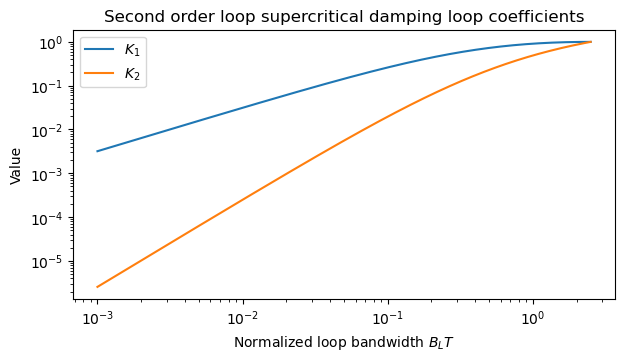

In [3]:
BLT = np.logspace(-3, np.log10(2.5), 1000)
plt.loglog(BLT, np.array(loop_coefficients(BLT)).T)
plt.legend(['$K_1$', '$K_2$'])
plt.title('Second order loop supercritical damping loop coefficients')
plt.xlabel('Normalized loop bandwidth $B_L T$')
plt.ylabel('Value');

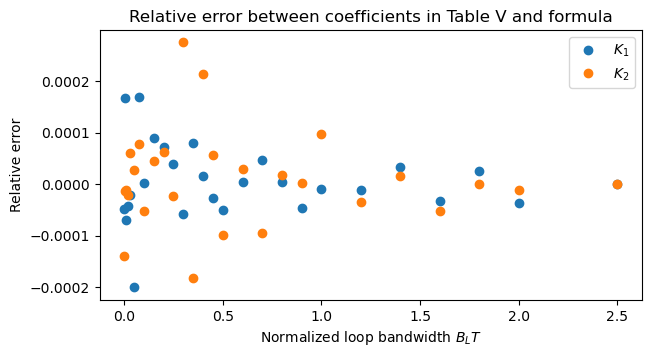

In [4]:
# Table V in the paper
BLT_table = np.array([0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35,
                      0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.5])
K1_table = np.array([0.003193, 0.01582, 0.03130, 0.06125, 0.08993, 0.1438, 0.2051, 0.2607, 0.3572,
                     0.4379, 0.5061, 0.5643, 0.6142, 0.6575, 0.6952, 0.7282, 0.7828, 0.8257,
                     0.8599, 0.8874, 0.9096, 0.9425, 0.9645, 0.9793, 0.9889, 0.995, 1.0])
K2_table = np.array([2.553e-6, 6.309e-5, 0.0002488, 0.0009677, 0.002118, 0.005576, 0.01176,
                     0.01965, 0.03931, 0.06264, 0.08835, 0.1155, 0.1436, 0.1720, 0.2006,
                     0.2291, 0.2851, 0.3394, 0.3915, 0.4414, 0.4890, 0.5779, 0.6588, 0.7328,
                     0.8006, 0.8631, 1.0])
K1_formula, K2_formula = loop_coefficients(BLT_table)

plt.plot(BLT_table, (K1_formula - K1_table) / K1_table, 'o')
plt.plot(BLT_table, (K2_formula - K2_table) / K2_table, 'o')
plt.legend(['$K_1$', '$K_2$'])
plt.title('Relative error between coefficients in Table V and formula')
plt.xlabel('Normalized loop bandwidth $B_L T$')
plt.ylabel('Relative error');